In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SVC for classification through support vector machine
from sklearn.svm import SVC

# importing train test split & GridSearchCV library
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# standardization library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# pipelline libraray
from sklearn.pipeline import Pipeline

# figure parameters
sns.set_theme(style='darkgrid', palette='Set1')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 200

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('forestfires.csv')

In [3]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df.duplicated().sum()

8

In [7]:
df.drop_duplicates(keep = 'first', inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


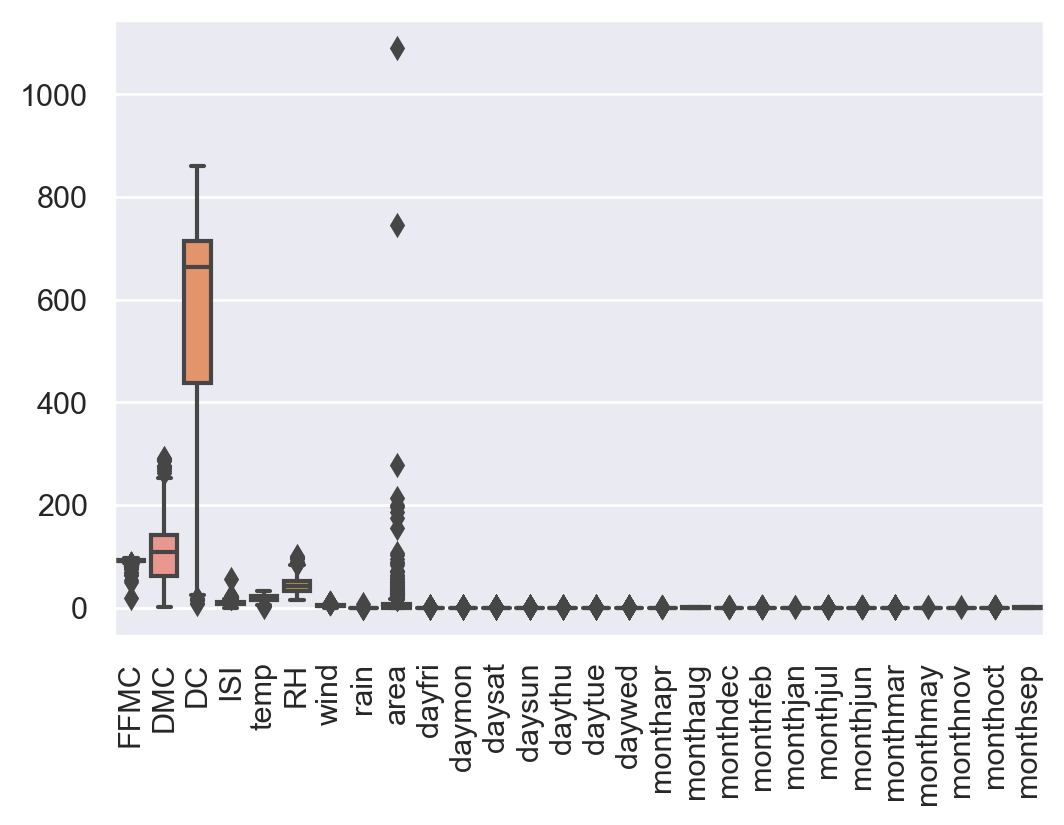

In [10]:
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.show()

In [11]:
def outlier_remove(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[col]>upper,col] = upper
    df.loc[df[col]<lower,col] = lower

In [12]:
outlier_remove(df,'FFMC')
outlier_remove(df,'DMC')
outlier_remove(df,'DC')
outlier_remove(df,'ISI')
outlier_remove(df,'RH')
outlier_remove(df,'wind')
outlier_remove(df,'rain')
outlier_remove(df,'area')

In [13]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,84.5,4.0,0.0,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,84.5,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [14]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

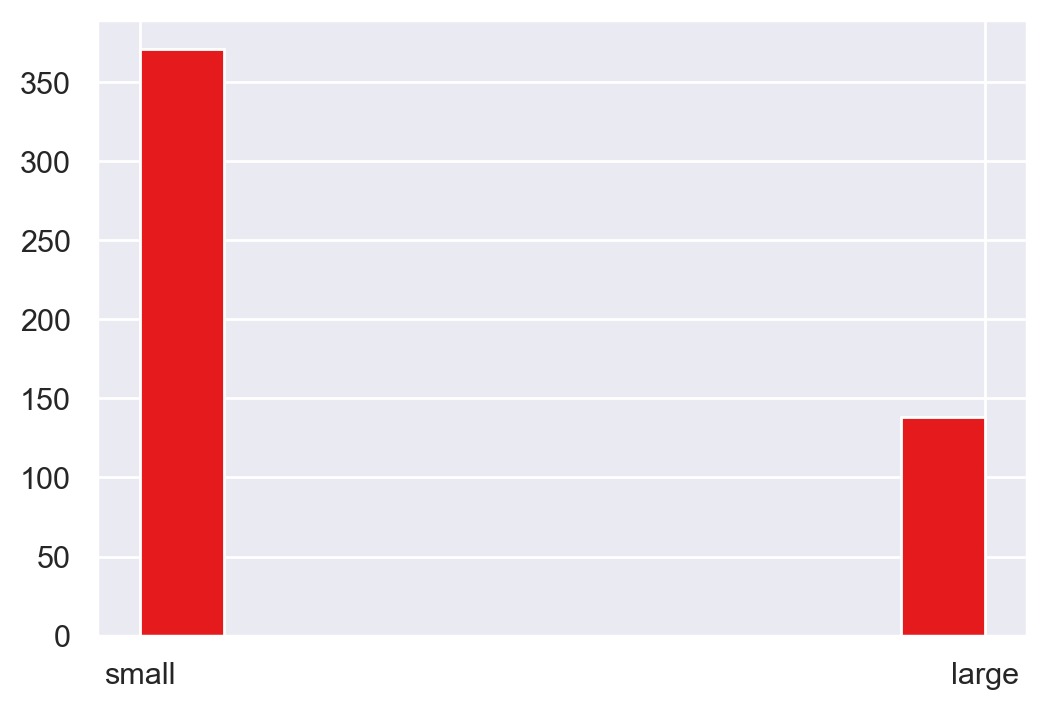

In [15]:
plt.hist(df['size_category'])
plt.show()

In [16]:
df.drop(columns = ['month','day'], axis = 1, inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [18]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = lb.fit_transform(df[col])

In [19]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.20,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.60,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.60,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.70,33.3,77.5,9.0,8.3,84.5,4.0,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.30,51.3,102.2,9.6,11.4,84.5,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,86.15,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,86.15,56.7,665.6,1.9,21.9,71.0,5.8,0.0,16.45,0,...,0,0,0,0,0,0,0,0,0,0
514,86.15,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.40,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


# Model training
* Data splitting

In [20]:
x = df.drop('size_category',axis = 1)
y = df['size_category']
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=101)

* Data Stadardization

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

* Creating a base model on default hyperparameter

In [22]:
svc = SVC()
svc.fit(x_train, y_train)
base_pred = svc.predict(x_test)
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        39
           1       0.93      0.98      0.95       114

    accuracy                           0.93       153
   macro avg       0.93      0.88      0.90       153
weighted avg       0.93      0.93      0.93       153



In [23]:
svc.score(x_train,y_train)

0.9747191011235955

In [24]:
svc.score(x_test,y_test)

0.9281045751633987

* Using Grid Search method to findout best performing hyperparameters

In [25]:
param = {'C' : [0.1,0.5,0.9],
        'kernel': ['rbf','linear']}

svc = SVC(kernel = 'linear')

In [26]:
model = GridSearchCV(estimator = svc, param_grid = param, cv = 5)
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 0.5, 0.9], 'kernel': ['rbf', 'linear']})

In [27]:
#check best best perfroming estimators
model.best_estimator_

SVC(C=0.1, kernel='linear')

In [28]:
# predictions on test data
final_pred = model.predict(x_test)

In [29]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.98      0.99      0.99       114

    accuracy                           0.98       153
   macro avg       0.98      0.97      0.97       153
weighted avg       0.98      0.98      0.98       153



In [30]:
model.score(x_train,y_train)

0.9859550561797753

In [31]:
model.score(x_test,y_test)

0.9803921568627451